## **Name:** Atharv Gupta

## **Computing ID:** xur8hs

used ChatGPT 4o



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

# Lab 4: Unsupervised Learning (100 Points)

In this lab, we will implement 2 models in the unsupervised learning family **K-means clustering** and **Principal Component Analysis (PCA)**.

You will utilize the skills you have gained over the semester to build, explore, and evaluate your models. As always, you will be graded on your model building and interpretation of  results rather than specific performance.

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*h-lAg5H-ZNDRXxX2.png)

# **Part 1: K-Means Clustering (50 points)**

## For Part 1, you will pick from the following preloaded datasets:



In [ ]:
pokemon_df = pd.read_csv("https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv")

In [ ]:
# Load Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Another option open to you, if you wish, is to  utilize a dataset of your choice (including your final project dataset).**

I will be using my NBA (final project) dataset


In a text cell, answer the following exploratory questions and support your observations with any code, if needed.

## **Question 1 (5 points):**
## Read in your dataset as a Pandas DataFrame. Show the first 5 rows. How many rows and columns do you have?

## What are your features and their datatypes?

In [3]:
#using my final dataset
df=pd.read_csv('/content/cleaned_nba_stats.csv')

In [ ]:
df.head(5)

,SCOPE,TM,RS,NAME,G,GS,MIN,FG,FGA,FG_PCT,...,AST,PF,DQ,STL,TO,BLK,PTS,PPG,HI,Starter
0,Total,NY,ACT,"Achiuwa, Precious",56,9,1137,156,309,0.505,...,53,77,1,45,43,42,361,6.4,26,0
1,Total,HOU,ACT,"Adams, Steven",57,3,777,89,163,0.546,...,65,58,0,22,53,28,221,3.9,14,0
2,Total,MIA,ACT,"Adebayo, Bam",78,78,2674,540,1113,0.485,...,337,162,0,98,161,53,1410,18.1,34,1
3,Total,TOR,ACT,"Agbaji, Ochai",63,44,1701,260,519,0.501,...,97,120,1,54,53,29,653,10.4,24,1
4,Total,MEM,ACT,"Aldama, Santi",65,16,1660,313,648,0.483,...,188,76,0,52,71,29,811,12.5,29,0


In [ ]:
df.shape

(489, 29)

In [ ]:
print(df.dtypes)

SCOPE       object
TM          object
RS          object
NAME        object
G            int64
GS           int64
MIN          int64
FG           int64
FGA          int64
FG_PCT     float64
FG3          int64
FG3A         int64
FG3_PCT    float64
FT           int64
FTA          int64
FT_PCT     float64
OFF          int64
DEF          int64
TREB         int64
AST          int64
PF           int64
DQ           int64
STL          int64
TO           int64
BLK          int64
PTS          int64
PPG        float64
HI           int64
Starter      int64
dtype: object


**There is a total of 489 rows and 29 columns. All the features and their datatypes are printed above.**

## **Question 2 (5 points):**
## Identify what percentage of each column has missing values and display this information (column name, percentage values missing) in a DataFrame.

## Then, fill in any missing values using any method appropriate for each column's data type and values.

In [ ]:
# Check and show percentage of missing values for all columns
missing_info = df.isnull().sum() / len(df) * 100
missing_df = pd.DataFrame({
    'Column Name': missing_info.index,
    'Percentage Missing': missing_info.values
})

# Display the full DataFrame
print(missing_df)


   Column Name  Percentage Missing
0        SCOPE                 0.0
1           TM                 0.0
2           RS                 0.0
3         NAME                 0.0
4            G                 0.0
5           GS                 0.0
6          MIN                 0.0
7           FG                 0.0
8          FGA                 0.0
9       FG_PCT                 0.0
10         FG3                 0.0
11        FG3A                 0.0
12     FG3_PCT                 0.0
13          FT                 0.0
14         FTA                 0.0
15      FT_PCT                 0.0
16         OFF                 0.0
17         DEF                 0.0
18        TREB                 0.0
19         AST                 0.0
20          PF                 0.0
21          DQ                 0.0
22         STL                 0.0
23          TO                 0.0
24         BLK                 0.0
25         PTS                 0.0
26         PPG                 0.0
27          HI      

There are no missing values in any of the columns. Dont need to impute as no missing values.

## **Question 3 (5 points):**
## Identify columns in your DataFrame that need to be encoded and use the proper encoder for each feature to transform your categorical data into numerical features.

## In a sentence per each encoded feature, justify your choice in encoder and why you utilized it

In [4]:
df.drop(columns=['SCOPE', 'RS'], inplace=True)
#dont need those columns as all rows have same value



In [5]:
#encoding team using one hot encoding
df = pd.get_dummies(df, columns=['TM'], drop_first=True)


**I encoded Feature TEAM with one hot encoding because its a categorical variable and it is not ordinal in nature, hence usign OHE is the relevant technique to encode.**

## **Question 4 (5 points):**
## Finally, identify your numerical columns and apply both standardization and normalization.

## Display each numerical column name and its minimum and maximum values in a DataFrame after these 2 processes.

## In 2 to 3 sentences, summarize the DataFrame and the effects of your choice in standardization and normalization had on your numerical features? Why would scaling your data be beneficial for unsupervised learning?

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 1: Identify numerical columns (excluding TM_ and Starter)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if not col.startswith('TM_') and col != 'Starter']

# Step 2: Standardize
scaler_std = StandardScaler()
standardized_data = pd.DataFrame(scaler_std.fit_transform(df[numerical_cols]), columns=numerical_cols)

# Step 3: Normalize
scaler_minmax = MinMaxScaler()
final_scaled_data = pd.DataFrame(scaler_minmax.fit_transform(standardized_data), columns=numerical_cols)

# Step 4: Create summary of min and max per column
summary_df = pd.DataFrame({
    'Column': numerical_cols,
    'Min': final_scaled_data.min().values,
    'Max': final_scaled_data.max().values
})


print(summary_df)


     Column  Min  Max
0         G  0.0  1.0
1        GS  0.0  1.0
2       MIN  0.0  1.0
3        FG  0.0  1.0
4       FGA  0.0  1.0
5    FG_PCT  0.0  1.0
6       FG3  0.0  1.0
7      FG3A  0.0  1.0
8   FG3_PCT  0.0  1.0
9        FT  0.0  1.0
10      FTA  0.0  1.0
11   FT_PCT  0.0  1.0
12      OFF  0.0  1.0
13      DEF  0.0  1.0
14     TREB  0.0  1.0
15      AST  0.0  1.0
16       PF  0.0  1.0
17       DQ  0.0  1.0
18      STL  0.0  1.0
19       TO  0.0  1.0
20      BLK  0.0  1.0
21      PTS  0.0  1.0
22      PPG  0.0  1.0
23       HI  0.0  1.0


**The methods I used to standardize and normalize my data caused the values of my data to range from 0 to 1.**

**I think scaling your data is helpful for unsupervised learning because scaled data puts all features on a comparable scale. Its minimizes risk of a couple features heavily influencing our results**

## **Question 5 (7 points):**
## Create a function to instantiate K-Means Clustering model with a user inputted parameter for "k" number clusters. Also tune a minimum of 3 hyperparameters of your choice, referencing documentation as necessary:
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html  


## Fit your model to your data, adding your predictions in a column of your DataFrame called cluster. Return this new dataframe in your function. Call your function on your data with k = 3.

In [7]:
final_scaled_data.head()

,G,GS,MIN,FG,FGA,FG_PCT,FG3,FG3A,FG3_PCT,FT,...,TREB,AST,PF,DQ,STL,TO,BLK,PTS,PPG,HI
0,0.679487,0.111111,0.372231,0.181395,0.184625,0.628109,0.031949,0.044192,0.463333,0.064892,...,0.319415,0.060227,0.299611,0.142857,0.196507,0.121127,0.238636,0.144297,0.185759,0.406780
1,0.692308,0.037037,0.253223,0.103488,0.096247,0.679104,0.000000,0.001263,0.000000,0.071547,...,0.332985,0.073864,0.225681,0.000000,0.096070,0.149296,0.159091,0.087868,0.108359,0.203390
2,0.961538,0.962963,0.880331,0.627907,0.671308,0.603234,0.252396,0.277778,0.595000,0.417637,...,0.779749,0.382955,0.630350,0.000000,0.427948,0.453521,0.301136,0.567110,0.547988,0.542373
3,0.769231,0.543210,0.558678,0.302326,0.311743,0.623134,0.316294,0.308081,0.673333,0.056572,...,0.248434,0.110227,0.466926,0.142857,0.235808,0.149296,0.164773,0.261991,0.309598,0.372881
4,0.794872,0.197531,0.545124,0.363953,0.389831,0.600746,0.383387,0.410354,0.613333,0.108153,...,0.432150,0.213636,0.295720,0.000000,0.227074,0.200000,0.164773,0.325675,0.374613,0.457627


In [8]:
# Step 1: Get one-hot encoded columns (those starting with 'TM_')
tm_columns = [col for col in df.columns if col.startswith('TM_')]

# Step 2: Concatenate scaled numerical data with one-hot encoded team columns
combined_df = pd.concat([
    final_scaled_data,    # your scaled numerical features
    df[tm_columns]        # one-hot encoded categorical features
], axis=1)


In [9]:
combined_df.head()

,G,GS,MIN,FG,FGA,FG_PCT,FG3,FG3A,FG3_PCT,FT,...,TM_OKC,TM_ORL,TM_PHI,TM_PHO,TM_POR,TM_SA,TM_SAC,TM_TOR,TM_UTA,TM_WAS
0,0.679487,0.111111,0.372231,0.181395,0.184625,0.628109,0.031949,0.044192,0.463333,0.064892,...,False,False,False,False,False,False,False,False,False,False
1,0.692308,0.037037,0.253223,0.103488,0.096247,0.679104,0.000000,0.001263,0.000000,0.071547,...,False,False,False,False,False,False,False,False,False,False
2,0.961538,0.962963,0.880331,0.627907,0.671308,0.603234,0.252396,0.277778,0.595000,0.417637,...,False,False,False,False,False,False,False,False,False,False
3,0.769231,0.543210,0.558678,0.302326,0.311743,0.623134,0.316294,0.308081,0.673333,0.056572,...,False,False,False,False,False,False,False,True,False,False
4,0.794872,0.197531,0.545124,0.363953,0.389831,0.600746,0.383387,0.410354,0.613333,0.108153,...,False,False,False,False,False,False,False,False,False,False


In [10]:

df[tm_columns] = df[tm_columns].astype(int)
combined_df = pd.concat([
    final_scaled_data,
    df[tm_columns]
], axis=1)

# I need my one hot encoded columns to be int instead of boolean to be propoerly working in the k means clustering model

In [11]:
combined_df.head()

,G,GS,MIN,FG,FGA,FG_PCT,FG3,FG3A,FG3_PCT,FT,...,TM_OKC,TM_ORL,TM_PHI,TM_PHO,TM_POR,TM_SA,TM_SAC,TM_TOR,TM_UTA,TM_WAS
0,0.679487,0.111111,0.372231,0.181395,0.184625,0.628109,0.031949,0.044192,0.463333,0.064892,...,0,0,0,0,0,0,0,0,0,0
1,0.692308,0.037037,0.253223,0.103488,0.096247,0.679104,0.000000,0.001263,0.000000,0.071547,...,0,0,0,0,0,0,0,0,0,0
2,0.961538,0.962963,0.880331,0.627907,0.671308,0.603234,0.252396,0.277778,0.595000,0.417637,...,0,0,0,0,0,0,0,0,0,0
3,0.769231,0.543210,0.558678,0.302326,0.311743,0.623134,0.316294,0.308081,0.673333,0.056572,...,0,0,0,0,0,0,0,1,0,0
4,0.794872,0.197531,0.545124,0.363953,0.389831,0.600746,0.383387,0.410354,0.613333,0.108153,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.cluster import KMeans

def kmeans_cluster(df, k):
    # Step 1: Instantiate KMeans with tuned hyperparameters
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        max_iter=300,
        random_state=42
    )

    # Step 2: Fit the model to the data
    kmeans.fit(df)

    # Step 3: Get cluster labels from the fitted model
    cluster_labels = kmeans.labels_

    # Step 4: Add cluster labels to a copy of the input DataFrame
    df_with_clusters = df.copy()
    df_with_clusters['cluster'] = cluster_labels

    return df_with_clusters


In [13]:
#passing k = 3 with my data into this function
clustered_df = kmeans_cluster(combined_df, k=3)
clustered_df.head()

,G,GS,MIN,FG,FGA,FG_PCT,FG3,FG3A,FG3_PCT,FT,...,TM_ORL,TM_PHI,TM_PHO,TM_POR,TM_SA,TM_SAC,TM_TOR,TM_UTA,TM_WAS,cluster
0,0.679487,0.111111,0.372231,0.181395,0.184625,0.628109,0.031949,0.044192,0.463333,0.064892,...,0,0,0,0,0,0,0,0,0,0
1,0.692308,0.037037,0.253223,0.103488,0.096247,0.679104,0.000000,0.001263,0.000000,0.071547,...,0,0,0,0,0,0,0,0,0,1
2,0.961538,0.962963,0.880331,0.627907,0.671308,0.603234,0.252396,0.277778,0.595000,0.417637,...,0,0,0,0,0,0,0,0,0,2
3,0.769231,0.543210,0.558678,0.302326,0.311743,0.623134,0.316294,0.308081,0.673333,0.056572,...,0,0,0,0,0,0,1,0,0,0
4,0.794872,0.197531,0.545124,0.363953,0.389831,0.600746,0.383387,0.410354,0.613333,0.108153,...,0,0,0,0,0,0,0,0,0,0


## **Question 6 (5 points):**
## Write code to plot your predicted clusters, with different colors for different cluster numbers. Apply this code to the predictions you obtained in Question 5 and describe the output.

## In a minimum of 3 sentences, based on all the information you have, describe why k = 3 seems like a reasonable or unreasounable amount of clusters for your data.

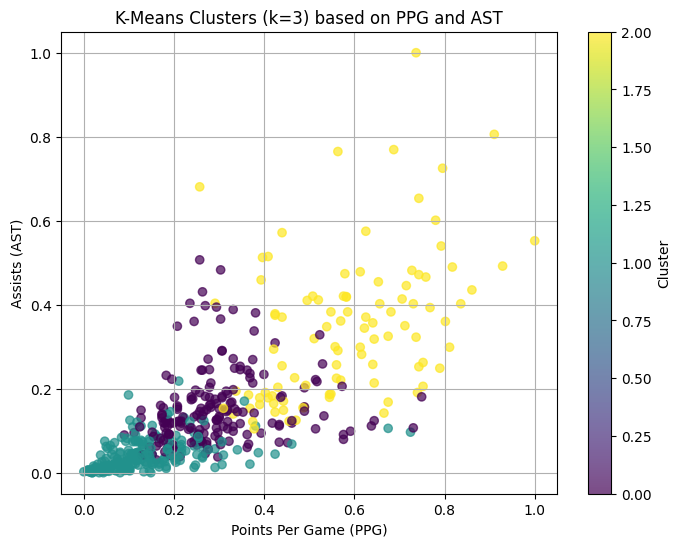

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    clustered_df['PPG'],
    clustered_df['AST'],
    c=clustered_df['cluster'],
    cmap='viridis',
    alpha=0.7
)
plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Assists (AST)')
plt.title('K-Means Clusters (k=3) based on PPG and AST')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()




**Because the predicted clusters show 3 clear clusters, I believe k=3 is a reasonable choice. We can see in the bottom left corner (turquoise), middle (purple), and right (yellow), the 3 different clusters of types of players. This signifies different types of players. The ones in the top right who have their PPG and AST closest to 1 (as data is normalized) are the highest acheiving players with high points per game this season and high avg. assists per game, perhaps someone like Luka Doncic.**

## **Question 7 (8 points):**
## Plot an elbow plot for your clustering model with any metric of your choice and pick an optimal k value.

## Then, utilize the optimal k to tune at least 3 K-Means Clustering models by varying the hyperparameters. For each model, you will use the optimal k number of clusters you identified in your elbow plot but vary at least 3 other hyperparameters. Plot your predicted clusters differentiated by color.

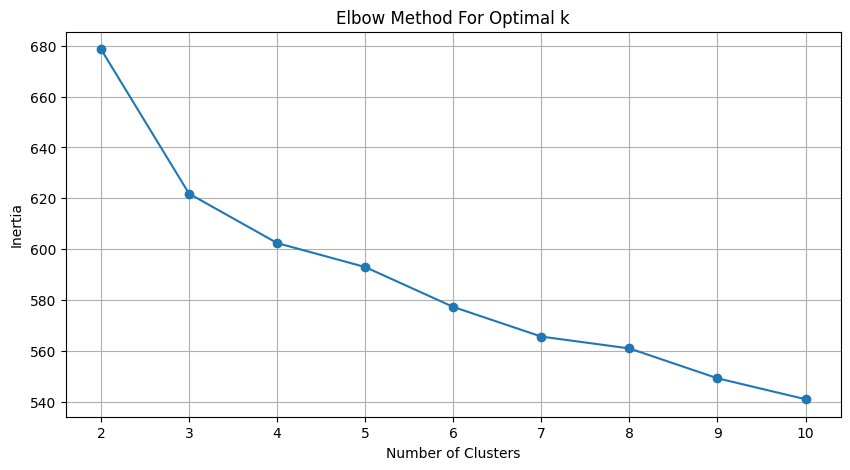

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Drop 'cluster' column from features if it exists
features_for_elbow = combined_df.drop(columns=['cluster']) if 'cluster' in combined_df.columns else combined_df.copy()

# Step 2: Elbow plot using inertia
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_for_elbow)
    inertia.append(kmeans.inertia_)

# Step 3: Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


I think the optimal k value is k = 4

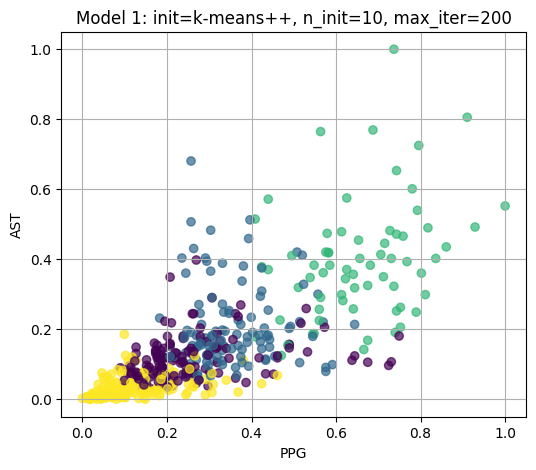

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop 'cluster' if it exists
features1 = combined_df.drop(columns=['cluster']) if 'cluster' in combined_df.columns else combined_df.copy()

# Model 1
kmeans1 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=200, random_state=23)
clusters1 = kmeans1.fit_predict(features1)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(features1['PPG'], features1['AST'], c=clusters1, cmap='viridis', alpha=0.7)
plt.title('Model 1: init=k-means++, n_init=10, max_iter=200')
plt.xlabel('PPG')
plt.ylabel('AST')
plt.grid(True)
plt.show()


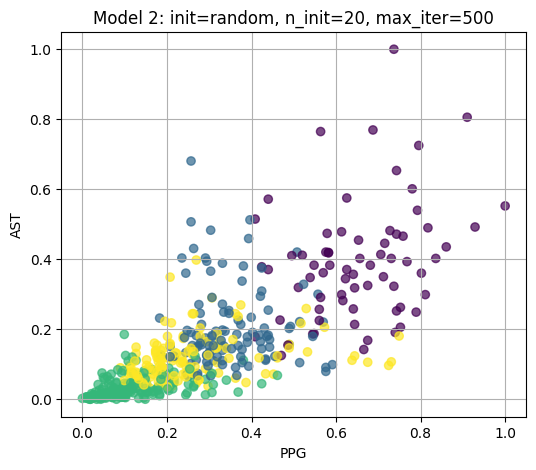

In [ ]:
# Model 2
kmeans2 = KMeans(n_clusters=4, init='random', n_init=20, max_iter=500, random_state=42)
clusters2 = kmeans2.fit_predict(features1)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(features1['PPG'], features1['AST'], c=clusters2, cmap='viridis', alpha=0.7)
plt.title('Model 2: init=random, n_init=20, max_iter=500')
plt.xlabel('PPG')
plt.ylabel('AST')
plt.grid(True)
plt.show()


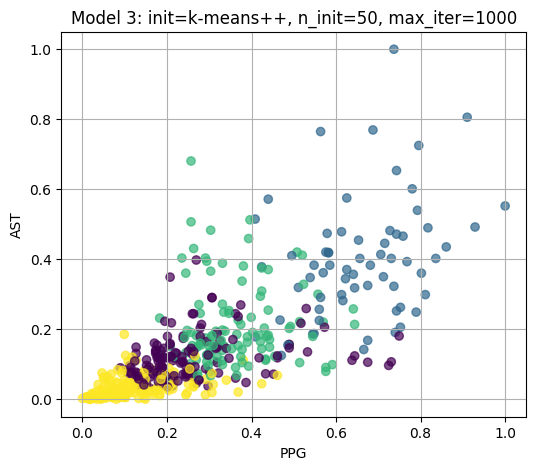

In [ ]:
# Model 3
kmeans3 = KMeans(n_clusters=4, init='random', n_init=50, max_iter=1000, random_state=3001)
clusters3 = kmeans3.fit_predict(features1)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(features1['PPG'], features1['AST'], c=clusters3, cmap='viridis', alpha=0.7)
plt.title('Model 3: init=k-means++, n_init=50, max_iter=1000')
plt.xlabel('PPG')
plt.ylabel('AST')
plt.grid(True)
plt.show()


## In a minimum of 5 sentences, reflect on your tuned models. Write what you judge the optimal amount of clusters to be and why. How do the plots of your clusters change with tuning specific parameters? Do your results make sense?

**I picked a k of 4 clusters because the elbow plot showed a clear drop in inertia around k = 4.**

**Yes. My tuned models make sense because I can clearly see 4 clusters dependent on the PPG and AST features. There is slight overlap between the clusters, but overall its good clustering. The plots change slightly with tuning specific parameters. I feel Model 1, produced the best clusters as I didnt use 'random' in the init parameter. Apart from that, I dont think the n_init, max_iter, and random_state had much of an effect on the clusters.**

## **Question 8 (10 points):**
## Now, examine the makeup of your clusters. Create plots and visualizations that may explain your initial groupings.

## You may do this by color coding your clusters by a given feature or by examining descriptive statistics of each cluster (ie: cluster 1 has an average temperature of 15 while cluster 2....)

## Write a **10 to 15 sentence** reflection on why you think your clusters have oriented the way they display. Are you clusters similar are very different in their feature makeup? Are you clusters similarly sized or are some much larger or smaller? Are there any aspects of the clusters that don't make sense when compared your original data or targets?




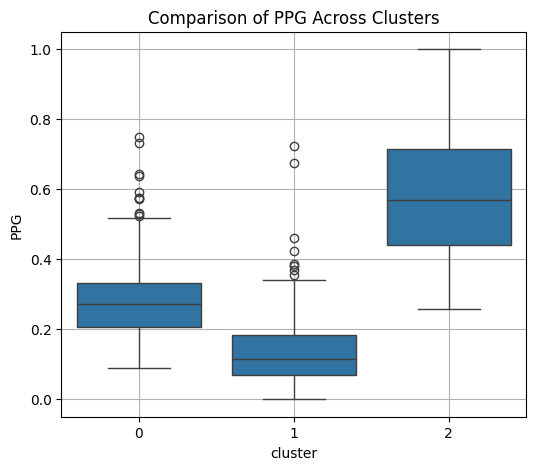

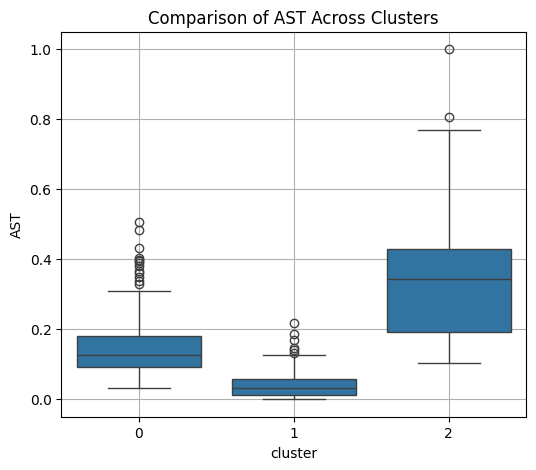

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace with features you want to examine
features_to_plot = ['PPG', 'AST']

for feature in features_to_plot:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='cluster', y=feature, data=clustered_df)
    plt.title(f'Comparison of {feature} Across Clusters')
    plt.grid(True)
    plt.show()


In [ ]:
clustered_df['cluster'].value_counts()

,count
cluster,
1,201
0,189
2,99


For reference, purple is cluster 0, turquoise is cluster 1, and yellow is cluster 2.

 **After examining my clusters, I believe the groupings make sense because they have accurate values for PPG and AST as seen in the boxplots. We see that cluster 2 has the highest PPG value, followed by cluster 0, and cluster 1 has the lowest PPG value. This is confirmed by the K-means clustering graph: as we move along the x axis, we first encounter the turquoise (cluster 1), then the purple (cluster 0), and then yellow (cluster 2).
We see a similar pattern in AST. We see that cluster 2 has the highest AST value, followed by cluster 0, and cluster 1 has the lowest AST value. This is confirmed by the K-means clustering graph: as we move along the y axis, we first encounter the turquoise (cluster 1), then the purple (cluster 0), and then yellow (cluster 2).
Our clusters aren’t all equally sized, cluster 0 and 1 have ~200 datapoints, but cluster 2 only has ~100. I think everything about my clusters makes sense as I expected based on the original data.
Additionally, the separation across clusters feels intuitive — players with high scoring and assist stats naturally stand out from more passive contributors. The smaller size of cluster 2 also aligns with the real-world expectation that there are fewer high-impact players than role players. It was especially interesting to see how the clusters were formed without using the Starter column and still reflected likely starter vs. non-starter patterns. This reinforces the strength of the clustering model in identifying meaningful roles purely from performance metrics.**

# **Part 2: Principal Component Analysis (50 Points)**

## **Question 1 (15 points):**
## Fit a PCA model to a dataset if your choice. Write code to visualize the first 2 principal components and color code your groups to differentiate them.



In [15]:
df_pca=pd.read_csv('/content/cleaned_nba_stats.csv')

In [31]:
df_pca

,SCOPE,TM,RS,NAME,G,GS,MIN,FG,FGA,FG_PCT,...,AST,PF,DQ,STL,TO,BLK,PTS,PPG,HI,Starter
0,Total,NY,ACT,"Achiuwa, Precious",56,9,1137,156,309,0.505,...,53,77,1,45,43,42,361,6.4,26,0
1,Total,HOU,ACT,"Adams, Steven",57,3,777,89,163,0.546,...,65,58,0,22,53,28,221,3.9,14,0
2,Total,MIA,ACT,"Adebayo, Bam",78,78,2674,540,1113,0.485,...,337,162,0,98,161,53,1410,18.1,34,1
3,Total,TOR,ACT,"Agbaji, Ochai",63,44,1701,260,519,0.501,...,97,120,1,54,53,29,653,10.4,24,1
4,Total,MEM,ACT,"Aldama, Santi",65,16,1660,313,648,0.483,...,188,76,0,52,71,29,811,12.5,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Total,BRK,ACT,"Wilson, Jalen",78,21,1993,240,609,0.394,...,141,162,1,40,79,5,731,9.4,20,0
485,Total,NY,ACT,"Wright, Delon",39,7,614,43,125,0.344,...,74,23,0,34,22,12,120,3.1,12,0
486,Total,PHI,ACT,"Yabusele, Guerschon",70,43,1895,282,563,0.501,...,148,164,1,58,87,24,768,11.0,28,1
487,Total,ATL,ACT,"Young, Trae",76,76,2739,566,1376,0.411,...,880,145,0,91,355,12,1841,24.2,43,1


In [16]:
#making the playstyle column
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Define attack & defense features
attack_features = ['PTS', 'AST', 'FGA']
defense_features = ['TREB', 'STL', 'BLK']

# 2. Standardize them separately
attack_z = StandardScaler().fit_transform(df_pca[attack_features])
defense_z = StandardScaler().fit_transform(df_pca[defense_features])

# 3. Compute average standardized score for each player
df_pca['Attack_Score'] = attack_z.mean(axis=1)
df_pca['Defense_Score'] = defense_z.mean(axis=1)

# 4. Assign playstyle
df_pca['Playstyle'] = df_pca.apply(
    lambda row: 'Attack' if row['Attack_Score'] > row['Defense_Score'] else 'Defense',
    axis=1
)


In [33]:
df_pca

,SCOPE,TM,RS,NAME,G,GS,MIN,FG,FGA,FG_PCT,...,STL,TO,BLK,PTS,PPG,HI,Starter,Attack_Score,Defense_Score,Playstyle
0,Total,NY,ACT,"Achiuwa, Precious",56,9,1137,156,309,0.505,...,45,43,42,361,6.4,26,0,-0.441947,0.519212,Defense
1,Total,HOU,ACT,"Adams, Steven",57,3,777,89,163,0.546,...,22,53,28,221,3.9,14,0,-0.647729,0.098445,Defense
2,Total,MIA,ACT,"Adebayo, Bam",78,78,2674,540,1113,0.485,...,98,161,53,1410,18.1,34,1,1.774777,2.130222,Defense
3,Total,TOR,ACT,"Agbaji, Ochai",63,44,1701,260,519,0.501,...,54,53,29,653,10.4,24,1,0.073295,0.310135,Defense
4,Total,MEM,ACT,"Aldama, Santi",65,16,1660,313,648,0.483,...,52,71,29,811,12.5,29,0,0.536807,0.634821,Defense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Total,BRK,ACT,"Wilson, Jalen",78,21,1993,240,609,0.394,...,40,79,5,731,9.4,20,0,0.324523,-0.119450,Attack
485,Total,NY,ACT,"Wright, Delon",39,7,614,43,125,0.344,...,34,22,12,120,3.1,12,0,-0.732004,-0.490302,Defense
486,Total,PHI,ACT,"Yabusele, Guerschon",70,43,1895,282,563,0.501,...,58,87,24,768,11.0,28,1,0.325142,0.592961,Defense
487,Total,ATL,ACT,"Young, Trae",76,76,2739,566,1376,0.411,...,91,355,12,1841,24.2,43,1,3.702508,0.486379,Attack


In [17]:
features = [
    'PTS', 'AST', 'FGA', 'FG3A', 'FT_PCT', 'FG_PCT', 'TREB',
    'STL', 'BLK', 'TO', 'PF', 'MIN'
]
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Subset the DataFrame
X = df_pca[features]

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Create a DataFrame for visualization
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Playstyle'] = df_pca['Playstyle']  # attack/defense labels

# 5. Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Playstyle', palette='Set1')
plt.title('PCA: Player Playstyle Clustering (Attack vs Defense)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Playstyle')
plt.show()


NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

## **Question 2 (10 points):**
## Create 2 barplots:

*   The first barplot should show the percentage variance explained by each principal component

* The first barplot should show the **cumulative** percentage variance explained by each principal component. Add a horizontal red line on this graph depicting when the cumulative variance has hit 80%.


## Write 2 to 3 sentences on how many components explain 80% of the variability in your dataset. Are the results surprising given how much variance is in (or not in) your data? What features would you consider dropping based on your results and why?


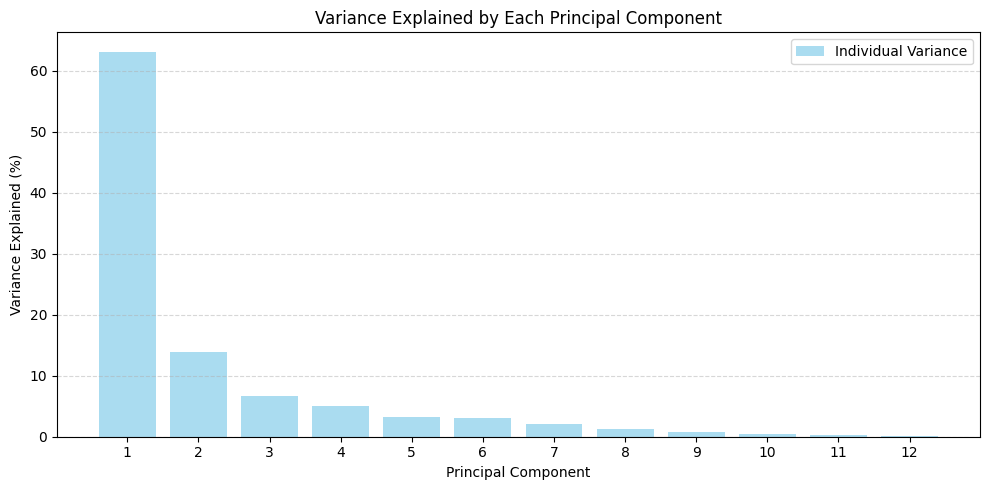

In [35]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

explained_variance = pca_full.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.bar(
    range(1, len(explained_variance) + 1),
    explained_variance * 100,
    alpha=0.7,
    color='skyblue',
    label='Individual Variance'
)

plt.xticks(range(1, len(explained_variance) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Variance Explained by Each Principal Component')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


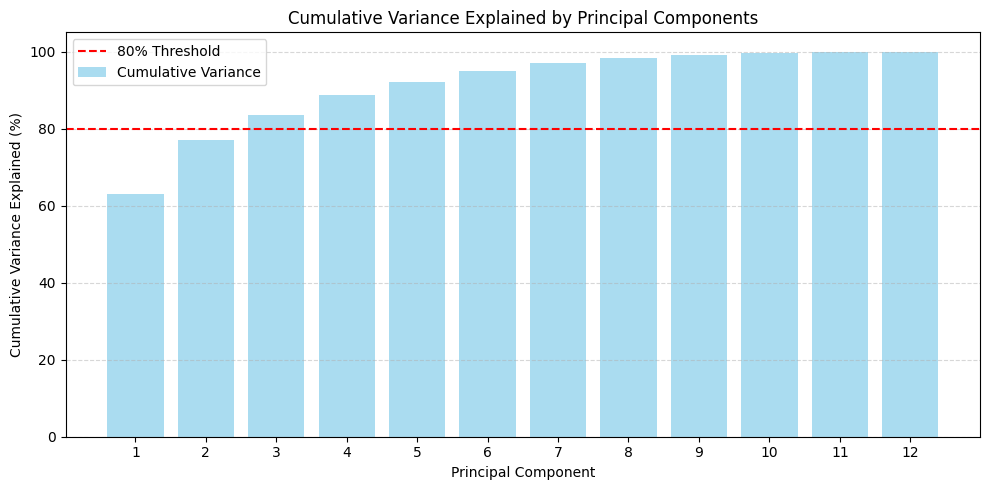

In [36]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))
plt.bar(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance * 100,
    alpha=0.7,
    color='skyblue',
    label='Cumulative Variance'
)

plt.axhline(y=80, color='red', linestyle='--', linewidth=1.5, label='80% Threshold')

plt.xticks(range(1, len(cumulative_variance) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained by Principal Components')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**It tales 3 components to explain about 80% of the variability in this NBA dataset. This suggests that most of the meaningful information in the dataset is just captured by a couple dimensions, which is not super surprising considering how closely related some of the stats in the dataset are.**

**I would consider dropping components past the 6 componenets as the marginal returns were negligible, and we would have reached about a 92-93% variability.**

## **Question 3 (25 points):**
## Write **3 paragraphs**, supported by code and exploratory analysis, explaining and exploring the groupings you see in your data. Utilize data features to justify why the components that explain so much of the variance in your data are reasonable. Explain what kind of applications or decision making your analysis can help support.

## You may choose to explore beyond simply the first 2 principal components if you wish.



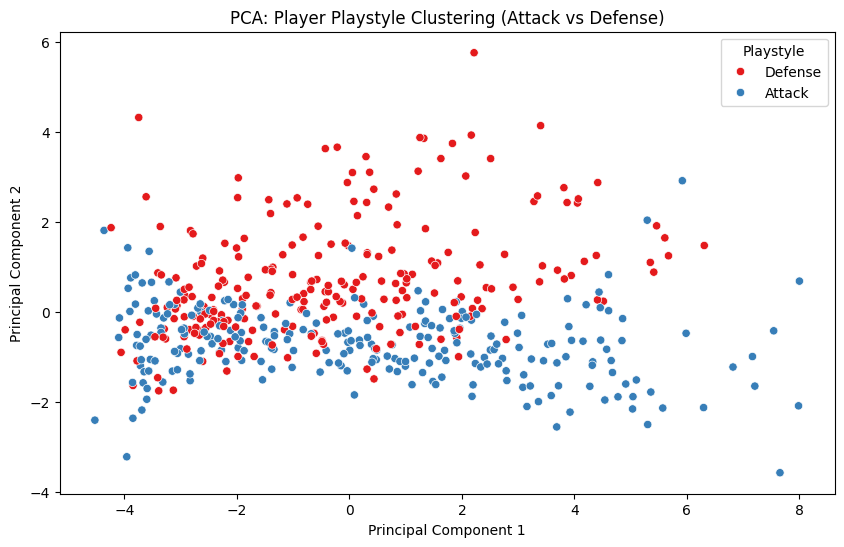

In [19]:
features = [
    'PTS', 'AST', 'FGA', 'FG3A', 'FT_PCT', 'FG_PCT', 'TREB',
    'STL', 'BLK', 'TO', 'PF', 'MIN'
]
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Subset the DataFrame
X = df_pca[features]

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Create a DataFrame for visualization
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Playstyle'] = df_pca['Playstyle']  # attack/defense labels

# 5. Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Playstyle', palette='Set1')
plt.title('PCA: Player Playstyle Clustering (Attack vs Defense)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Playstyle')
plt.show()


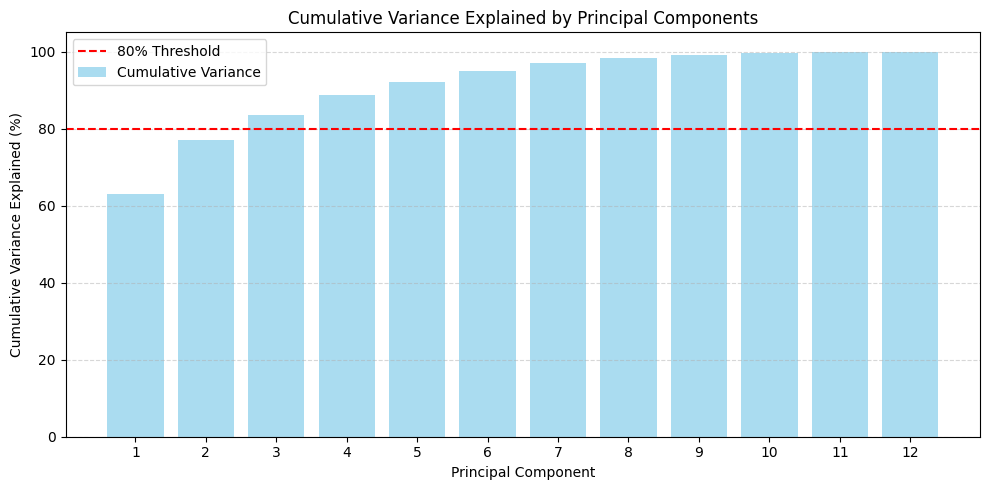

In [20]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))
plt.bar(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance * 100,
    alpha=0.7,
    color='skyblue',
    label='Cumulative Variance'
)

plt.axhline(y=80, color='red', linestyle='--', linewidth=1.5, label='80% Threshold')

plt.xticks(range(1, len(cumulative_variance) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained by Principal Components')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**The principal components show a clear separation between players based on their offensive and defensive strengths. As observed in the PCA scatterplot, players classified as "Attack" are mostly grouped on one side of the PC1 axis, while "Defense" players are clustered on the opposite. This indicates that PC1 may capture offensive attributes like points and assists, while PC2 captures additional variability like rebounds or blocks.**

**The PCs responsible for explaining the majority of variance are PC1 and PC2, which together account for roughly 76-77%. According to the scatter plot factored by color, PC1 is heavily influenced by features like PTS, FG_PCT, and AST, suggesting it reflects offensive performance. PC2, on the other hand, loads strongly on STL, BLK, and TO, indicating a defensive or turnover-related dimension. These results align with the expected playing styles of NBA athletes.**

**These results can be used for various decision-making tasks in sports analytics. For example, teams can use these principal components to scout players who excel in specific playstyles, or to cluster similar players when forming lineups. Additionally, dimensionality reduction through PCA helps eliminate redundant features, allowing analysts to focus only on the most influential statistics.**

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.

Atharv Gupta